Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datos

In [2]:
expuestos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Expuestos.txt', sep='\t', encoding='latin-1')
sociodemograficos = pd.read_csv('https://raw.githubusercontent.com/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/BD_Sociodemograficas.txt', sep='\t', encoding='latin-1')
siniestros = pd.read_csv('https://media.githubusercontent.com/media/JavierBurgos-web/Alll_Proyecto_Finanzas/main/2_data/DB_Siniestros.txt', sep=',', encoding='latin-1')

In [ ]:
sociodemograficos = sociodemograficos[sociodemograficos['Mujer'] != -1]
sociodemograficos = sociodemograficos.dropna()
siniestros['Mes_Pago'] = siniestros['Mes_Pago'].astype(str).str[:4] + '/' + siniestros['Mes_Pago'].astype(str).str[4:]

#### **1. LECTURA GLOBAL**

##### **1.1. BD EXPUESTOS**

In [13]:
print(f"La base de datos contiene {expuestos.shape[0]} observaciones y {expuestos.shape[1]} variables, \n" 
      f"dentro de la cual se presentan {expuestos.duplicated().sum()} registros duplicados, \n" 
      f"y {expuestos.isnull().sum().sum()} observaciones vacías en las siguientes variables:")
display(expuestos.isnull().sum())

La base de datos contiene 300900 observaciones y 5 variables, 
dentro de la cual se presentan 0 registros duplicados, 
y 148937 observaciones vacías en las siguientes variables:


Asegurado_Id                0
Poliza_Asegurado_Id         0
FECHA_INICIO                0
FECHA_CANCELACION      148937
FECHA_FIN                   0
dtype: int64

In [23]:
repetidos = expuestos['Asegurado_Id'].value_counts()
print(f"Se observa un promedio de {repetidos.mean().__round__(2)} reincidencias en la compra del seguro por usuario, \n"
      f"siendo {repetidos.max()} la mayor cantidad de compras por parte de un usuario y {repetidos.min()} la menor cantidad.")

Se observa un promedio de 1.13 reincidencias en la compra del seguro por usuario, 
siendo 7 la mayor cantidad de compras por parte de un usuario y 1 la menor cantidad.


##### **1.2. BD SOCIODEMOGRAFICOS**

In [28]:
print(f"La base de datos contiene {sociodemograficos.shape[0]} observaciones y {sociodemograficos.shape[1]} variables, \n" 
      f"dentro de la cual se presentan {sociodemograficos.duplicated().sum()} registros duplicados, \n"
      f"además, se observa que presenta {sociodemograficos['Asegurado_Id'].value_counts().max()} actualizaciones de información en algunos usuarios \n"
      f"y contiene {sociodemograficos.isnull().sum().sum()} observaciones vacías en las siguientes variables:")
display(sociodemograficos.isnull().sum())

La base de datos contiene 267312 observaciones y 9 variables, 
dentro de la cual se presentan 0 registros duplicados, 
además, se observa que presenta 2 actualizaciones de información en algunos usuarios 
y contiene 1 observaciones vacías en las siguientes variables:


Asegurado_Id          0
Mujer                 0
FechaNacimiento       0
Ciudad                1
CANCER                0
EPOC                  0
DIABETES              0
HIPERTENSION          0
ENF_CARDIOVASCULAR    0
dtype: int64

##### **1.3. BD SINIESTROS**

In [31]:
print(f"La base de datos contiene {siniestros.shape[0]} observaciones y {siniestros.shape[1]} variables, \n" 
      f"dentro de la cual se presentan {siniestros.duplicated().sum()} registros duplicados, \n" 
      f"y {siniestros.isnull().sum().sum()} observaciones vacías.")

La base de datos contiene 3308480 observaciones y 7 variables, 
dentro de la cual se presentan 0 registros duplicados, 
y 0 observaciones vacías.


#### **2. CONTEXTO DE LOS DATOS**

##### **2.1. BD EXPUESTOS**

In [53]:
print(f"Las variables de esta base se agrupan en los siguientes tipos: \n"
      f"{expuestos.dtypes.value_counts()} \n")
expuestos.info()

Las variables de esta base se agrupan en los siguientes tipos: 
object    3
int64     2
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300900 entries, 0 to 300899
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Asegurado_Id         300900 non-null  int64 
 1   Poliza_Asegurado_Id  300900 non-null  int64 
 2   FECHA_INICIO         300900 non-null  object
 3   FECHA_CANCELACION    151963 non-null  object
 4   FECHA_FIN            300900 non-null  object
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [59]:
expuestos['FECHA_INICIO'] = pd.to_datetime(expuestos['FECHA_INICIO'], format='%Y/%m/%d')
print(f"Los registos de venta de polizas correponden al periodo comprendido entre {expuestos['FECHA_INICIO'].min().year} y {expuestos['FECHA_INICIO'].max().year}")

Los registos de venta de polizas correponden al periodo comprendido entre 2018 y 2019


In [9]:
expuestos.select_dtypes(include='object').describe().T

,count,unique,top,freq
FECHA_INICIO,300900,730,2018/01/01,191371
FECHA_CANCELACION,151963,730,2019/12/31,68216
FECHA_FIN,300900,730,2019/12/31,217005


##### **2.2. BD SOCIODEMOGRAFICOS**

In [60]:
print(f"Las variables de esta base se agrupan en los siguientes tipos: \n"
      f"{sociodemograficos.dtypes.value_counts()} \n")
sociodemograficos.info()

Las variables de esta base se agrupan en los siguientes tipos: 
int64     7
object    2
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267312 entries, 0 to 267311
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Asegurado_Id        267312 non-null  int64 
 1   Mujer               267312 non-null  int64 
 2   FechaNacimiento     267312 non-null  object
 3   Ciudad              267311 non-null  object
 4   CANCER              267312 non-null  int64 
 5   EPOC                267312 non-null  int64 
 6   DIABETES            267312 non-null  int64 
 7   HIPERTENSION        267312 non-null  int64 
 8   ENF_CARDIOVASCULAR  267312 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 18.4+ MB


In [76]:
sociodemograficos.select_dtypes(include='object').describe().T

,count,unique,top,freq
Ciudad,267311,6,Cali,127149


In [86]:
sociodemograficos.select_dtypes(include='int64').describe().T

,count,mean,std,min,25%,50%,75%,max
Asegurado_Id,267312.0,2.491157e+07,1.639717e+07,738284.0,9295646.5,24447192.0,38855063.0,58584620.0
Mujer,267312.0,5.440272e-01,4.980963e-01,-1.0,0.0,1.0,1.0,1.0
CANCER,267312.0,3.460376e-03,5.872320e-02,0.0,0.0,0.0,0.0,1.0
EPOC,267312.0,1.639657e-02,1.269952e-01,0.0,0.0,0.0,0.0,1.0
DIABETES,267312.0,6.264590e-02,2.423254e-01,0.0,0.0,0.0,0.0,1.0
HIPERTENSION,267312.0,1.323547e-02,1.142819e-01,0.0,0.0,0.0,0.0,1.0
ENF_CARDIOVASCULAR,267312.0,4.702370e-03,6.841254e-02,0.0,0.0,0.0,0.0,1.0


In [89]:
sociodemograficos['FechaNacimiento'] = pd.to_datetime(sociodemograficos['FechaNacimiento'], format='%d/%m/%Y')
print(f"La base contiene registros de {sociodemograficos.Asegurado_Id.nunique()} usuarios \n"
    f"los cuales tienen una edad entre {2024-sociodemograficos['FechaNacimiento'].max().year} y {2024-sociodemograficos['FechaNacimiento'].min().year} años, con un promedio de {2024-sociodemograficos['FechaNacimiento'].mean().year} años. \n"
    f"Estos registros provenienen de {sociodemograficos.Ciudad.nunique()} ciudades, las cuales son:\n")
print(sociodemograficos.Ciudad.value_counts())

La base contiene registros de 267233 usuarios 
los cuales tienen una edad entre 1 y 110 años, con un promedio de 37 años. 
Estos registros provenienen de 6 ciudades, las cuales son:

Ciudad
Cali               127149
Bogota              49722
Cartagena           46180
Medellin            34845
Barranquilla         9342
Sin Información        73
Name: count, dtype: int64


In [ ]:
# Exploración de códigos de la variable 'Mujer'
# NOTA: Los registros bajo el código '-1' representan la ausencia de información
#       consultar que porcentaje ocupa, y de ser mínimo, eliminarlos
display(sociodemograficos['Mujer'].unique().tolist())

##### **2.3. BD SINIESTROS**

In [90]:
print(f"Las variables de esta base se agrupan en los siguientes tipos: \n"
      f"{siniestros.dtypes.value_counts()} \n")
siniestros.info()

Las variables de esta base se agrupan en los siguientes tipos: 
int64      3
object     3
float64    1
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308480 entries, 0 to 3308479
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Mes_Pago            int64  
 1   Asegurado_Id        int64  
 2   Reclamacion         object 
 3   Diagnostico_Codigo  object 
 4   Diagnostico_Desc    object 
 5   Eventos             int64  
 6   Valor_Pagado        float64
dtypes: float64(1), int64(3), object(3)
memory usage: 176.7+ MB


In [23]:
siniestros.select_dtypes(include='object').describe().T

,count,unique,top,freq
Reclamacion,3308480,41,CONSULTA EXTERNA,1255793
Diagnostico_Codigo,3308480,5830,9,2740383
Diagnostico_Desc,3308480,5751,DIAGNÃSTICO PENDIENTE,2740851


In [24]:
siniestros.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
Mes_Pago,3308480.0,2.018590e+05,5.005354e+01,201801.0,2.018070e+05,2.019010e+05,2.019070e+05,2.019120e+05
Asegurado_Id,3308480.0,2.061855e+07,1.594818e+07,738284.0,5.756561e+06,1.660835e+07,3.379461e+07,5.858458e+07
Eventos,3308480.0,2.213185e+00,3.517578e+00,0.0,1.000000e+00,1.000000e+00,2.000000e+00,2.790000e+02
Valor_Pagado,3308480.0,8.028421e+05,2.994635e+06,102000.0,4.346523e+05,4.842149e+05,6.304715e+05,1.977986e+09


In [92]:
print(f"La base contiene registros de {siniestros.Asegurado_Id.nunique()} usuarios. \n"
      f"En esta se encuentra {siniestros.Reclamacion.nunique()} tipos de reclamación \n"
      f"y {siniestros.Diagnostico_Codigo.nunique()} tipos de diagnostico \n")

La base contiene registros de 237167 usuarios. 
En esta se encuentra 41 tipos de reclamación 
y 5830 tipos de diagnostico 



In [ ]:
# Exploración de códigos de diagnosticos
# NOTA: Los registros bajo el código '-1' representan la ausencia de información
#       consultar que porcentaje ocupa, y de ser mínimo, eliminarlos
#       Los códigos '0' y '9' representan 'Diagnostico pendiente'. Para agruparlos. 
display(siniestros['diagnostico_codigo'].unique().tolist())

#### **3. EXPLORACIÓN DE ATRIBUTOS, PATRONES Y TENDENCIAS**

##### **3.1. BD EXPUESTOS**

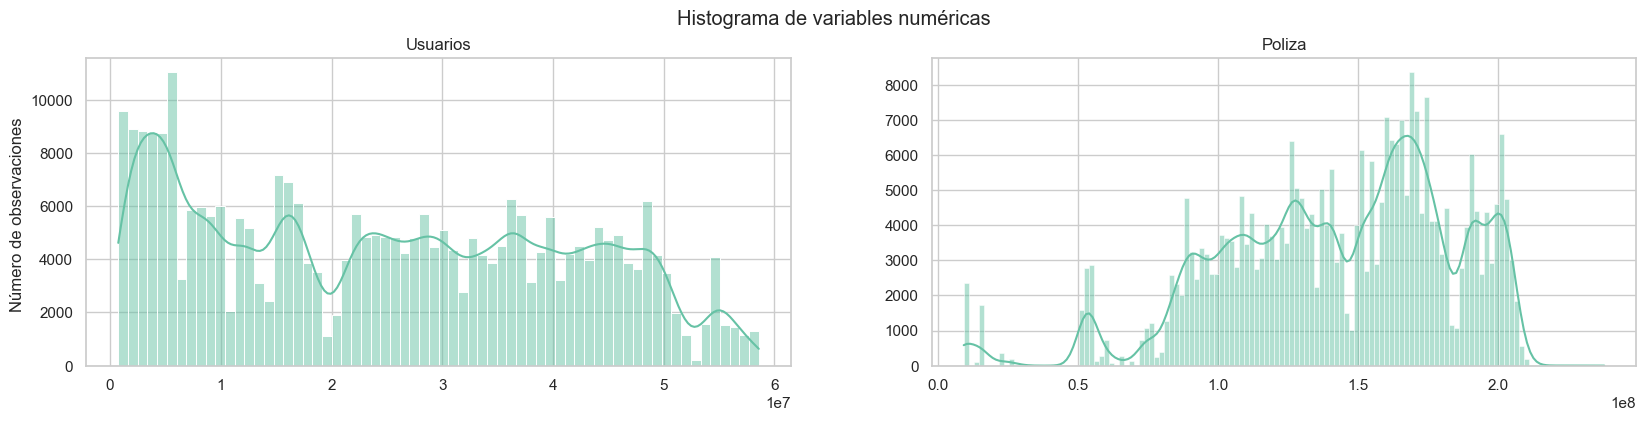

In [3]:
palette = 'Set2'
sns.set_theme(style="whitegrid", palette=palette)


fig, axs = plt.subplots(ncols=2, figsize=(20, 4))

sns.histplot(x='Asegurado_Id', data=expuestos, kde=True, ax=axs[0])
sns.histplot(x='Poliza_Asegurado_Id', data=expuestos, kde=True, ax=axs[1])
fig.suptitle('Histograma de variables numéricas ', y=1.00)

for ax in axs: ax.set(ylabel=None)
axs[0].set(ylabel='Número de observaciones ')
axs[0].set(xlabel=None, title='Usuarios')
axs[1].set(xlabel=None, title='Poliza');

##### **3.2. BD SOCIODEMOGRAFICOS**

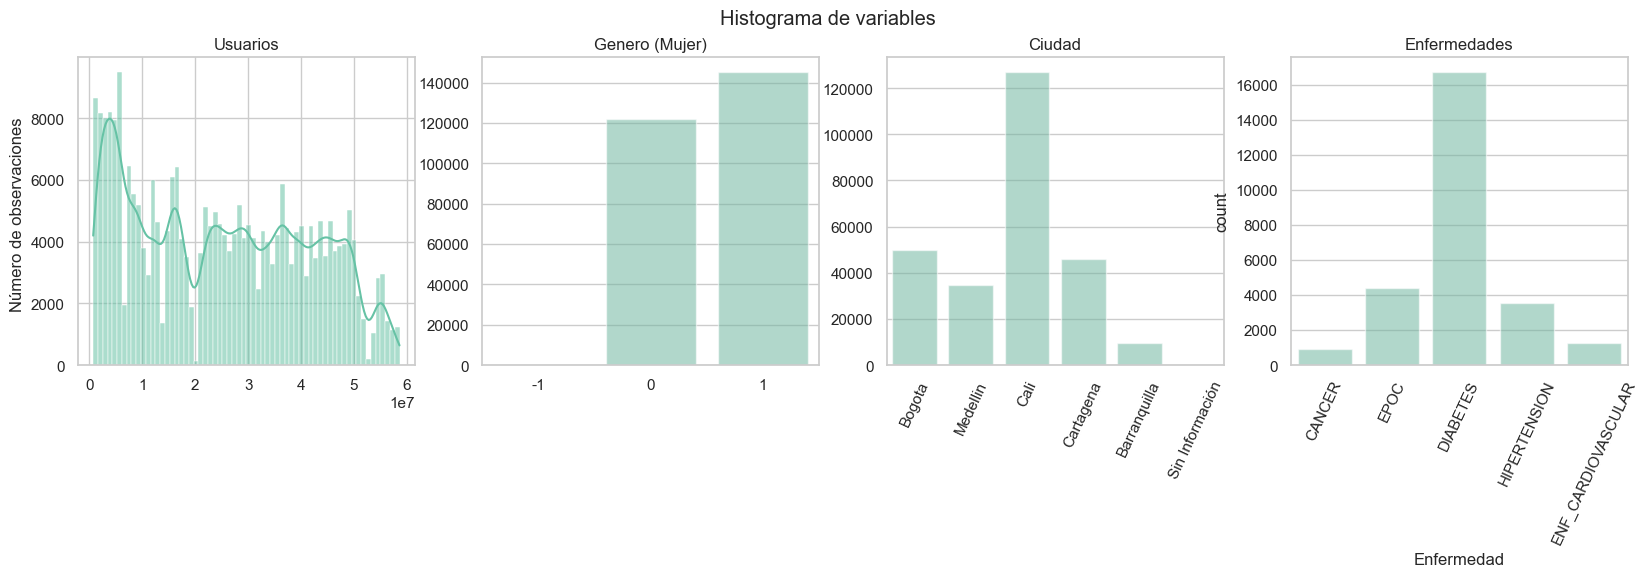

In [109]:
palette = 'Set2'
sns.set_theme(style="whitegrid", palette=palette)

fig, axs = plt.subplots(ncols=4, figsize=(20, 4))

sns.histplot(x='Asegurado_Id', data=sociodemograficos, kde=True, ax=axs[0], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='Mujer', data=sociodemograficos, ax=axs[1], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='Ciudad', data=sociodemograficos, ax=axs[2], color=sns.color_palette(palette)[0], alpha=.55)
fig.suptitle('Histograma de variables', y=1.00)

for ax in axs: ax.set(ylabel=None)
axs[0].set(ylabel='Número de observaciones ')
axs[0].set(xlabel=None, title='Usuarios')
axs[1].set(xlabel=None, title='Genero (Mujer)')
axs[2].set(xlabel=None, title='Ciudad')
axs[2].tick_params(axis='x', rotation=65)

# [Código gráfico 4] 
cols = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']

counts = {}
for col in cols:
    counts[col] = sociodemograficos[col].sum()

df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).reset_index()
df_counts = df_counts.rename(columns={'index': 'Enfermedad'})
expanded_data = df_counts.loc[df_counts.index.repeat(df_counts['Count'])].reset_index(drop=True)

sns.countplot(x='Enfermedad', data=expanded_data, ax=axs[3], color=sns.color_palette(palette)[0], alpha=.55)
axs[3].set(title='Enfermedades')
axs[3].tick_params(axis='x', rotation=65)
plt.show()

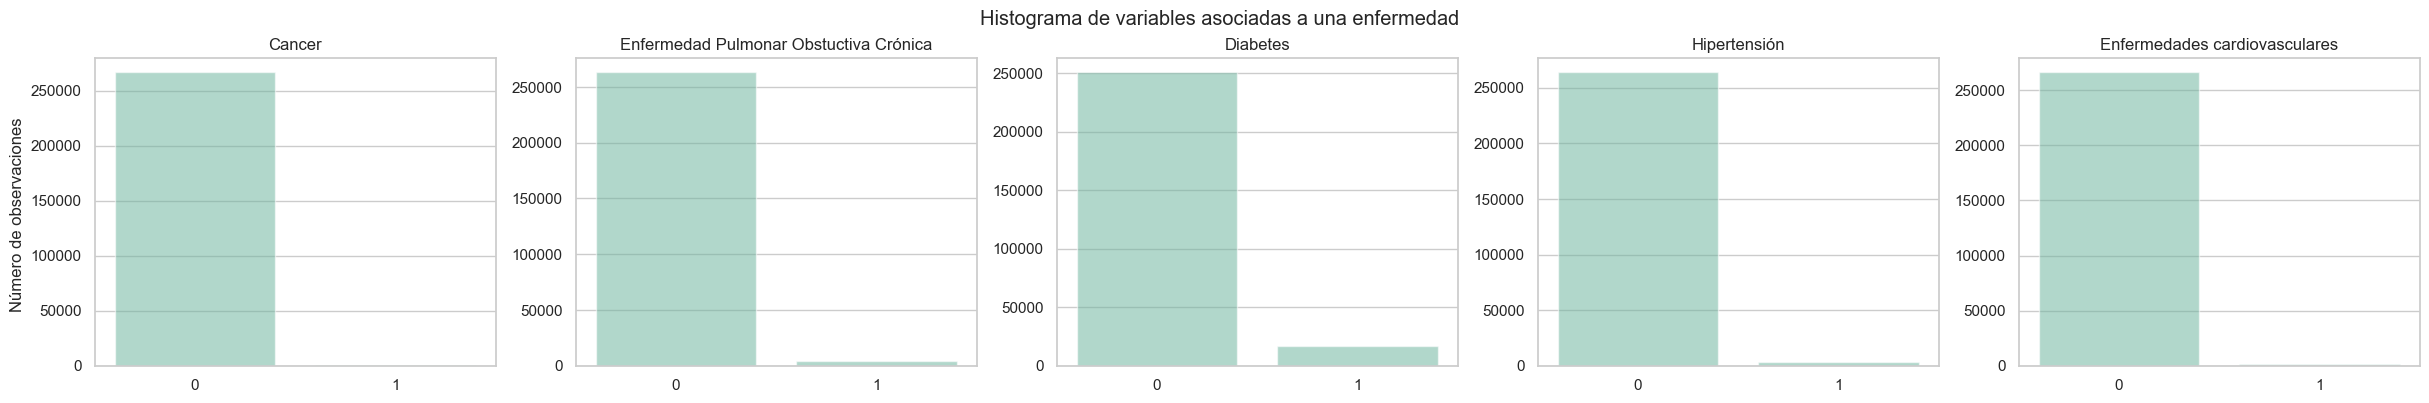

In [5]:
fig, axs = plt.subplots(ncols=5, figsize=(30, 4))

sns.countplot(x='CANCER', data=sociodemograficos, ax=axs[0], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='EPOC', data=sociodemograficos, ax=axs[1], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='DIABETES', data=sociodemograficos, ax=axs[2], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='HIPERTENSION', data=sociodemograficos, ax=axs[3], color=sns.color_palette(palette)[0], alpha=.55)
sns.countplot(x='ENF_CARDIOVASCULAR', data=sociodemograficos, ax=axs[4], color=sns.color_palette(palette)[0], alpha=.55)
fig.suptitle('Histograma de variables asociadas a una enfermedad', y=1.00)

for ax in axs: ax.set(ylabel=None)
axs[0].set(ylabel='Número de observaciones ')
axs[0].set(xlabel=None, title='Cancer')
axs[1].set(xlabel=None, title='Enfermedad Pulmonar Obstuctiva Crónica')
axs[2].set(xlabel=None, title='Diabetes')
axs[3].set(xlabel=None, title='Hipertensión')
axs[4].set(xlabel=None, title='Enfermedades cardiovasculares');

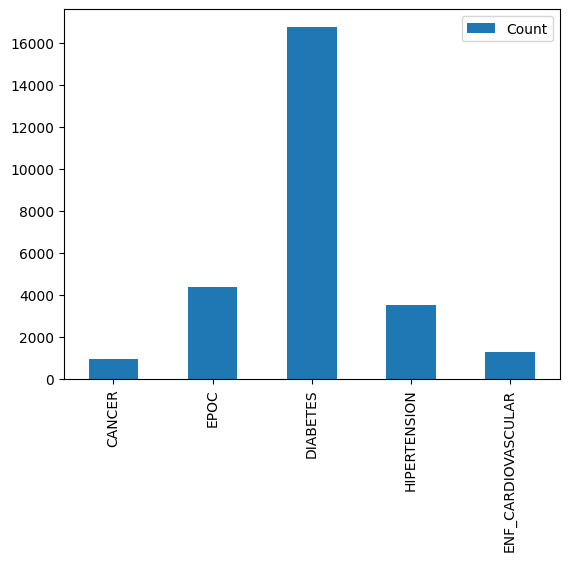

In [94]:
# Lista de columnas
cols = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']

# Diccionario para almacenar los recuentos
counts = {}

# Contar los '1's en cada columna
for col in cols:
    counts[col] = sociodemograficos[col].sum()

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Crear un gráfico de barras
df.plot(kind='bar')

# Mostrar el gráfico
plt.show()

##### **3.3. BD SINIESTROS**

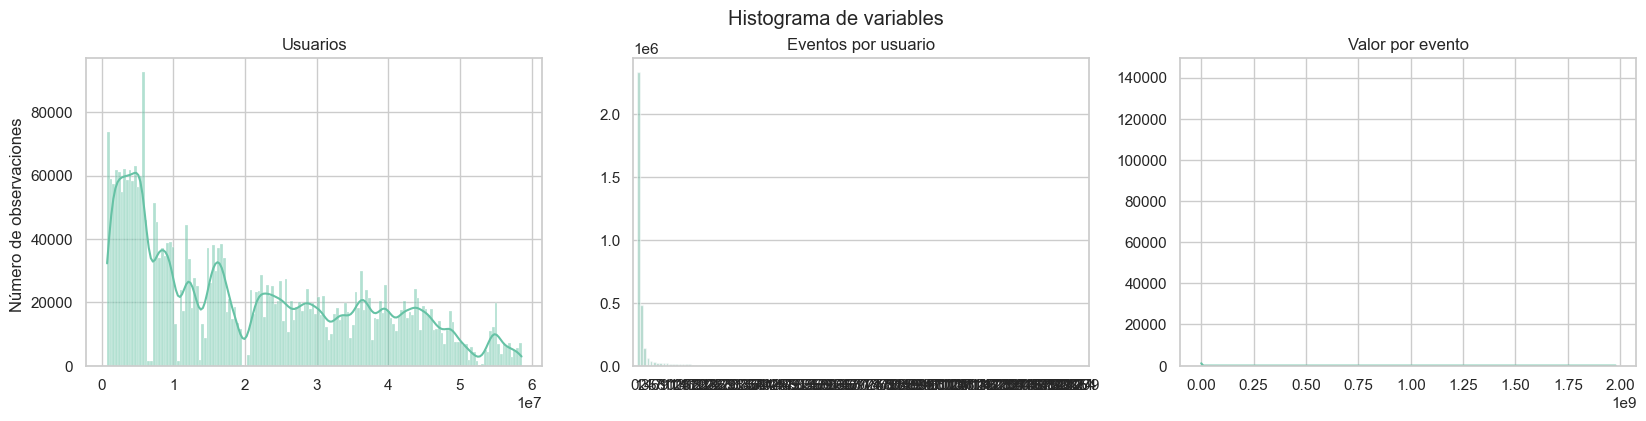

In [6]:
palette = 'Set2'
sns.set_theme(style="whitegrid", palette=palette)

fig, axs = plt.subplots(ncols=1, figsize=(10, 4))

sns.histplot(x='Asegurado_Id', data=siniestros, kde=True, ax=axs)
fig.suptitle('Histograma de variables', y=1.00)

axs.set(ylabel='Número de observaciones ')
axs.set(xlabel=None, title='Usuarios')

plt.show()

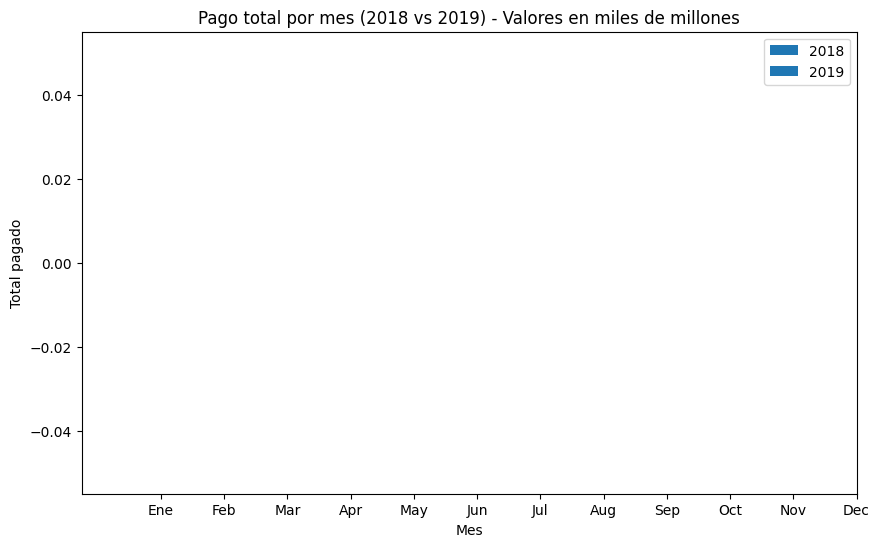

In [93]:
# Convertir 'Mes_Pago' a datetime
siniestros['Mes_Pago'] = pd.to_datetime(siniestros['Mes_Pago'])

# Extraer el mes y el año de 'Mes_Pago'
siniestros['Year_Pago'], siniestros['Month_Pago'] = siniestros['Mes_Pago'].dt.year, siniestros['Mes_Pago'].dt.month

# Agrupar los datos por mes y año y sumar los pagos
grouped = siniestros.groupby(['Year_Pago', 'Month_Pago'])['Valor_Pagado'].sum().reset_index()

# Filtrar por los años 2018 y 2019
data_2018 = grouped[grouped['Year_Pago'] == 2018]
data_2019 = grouped[grouped['Year_Pago'] == 2019]

plt.figure(figsize=(10, 6))

# Crear una lista de meses
months = range(1, 13)

# Crear barras para 2018
bars_2018 = plt.bar(data_2018['Month_Pago'], data_2018['Valor_Pagado'], width=0.4, label='2018')

# Crear barras para 2019
bars_2019 = plt.bar(data_2019['Month_Pago'] + 0.4, data_2019['Valor_Pagado'], width=0.4, label='2019')

plt.xlabel('Mes')
plt.ylabel('Total pagado')
plt.title('Pago total por mes (2018 vs 2019) - Valores en miles de millones')
plt.legend()

# Ajustar las marcas del eje x para que estén en el centro de las agrupaciones de barras
plt.xticks([month + 0.2 for month in months], ['Ene', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

#### **4. Limpieza general de datos y concatencaicon de BD**

In [6]:
merged_data = pd.merge(expuestos, sociodemograficos, on='Asegurado_Id', how='inner')
merged_data = pd.merge(merged_data, siniestros, on='Asegurado_Id', how='inner')
merged_data = merged_data.drop(["Year_Pago", "Month_Pago"], axis=1)
merged_data

,Asegurado_Id,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN,Mujer,FechaNacimiento,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Mes_Pago,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,11885152,141320760,2018/01/01,NaN,2019/12/31,0,4/07/1974,Bogota,0,0,0,0,0,2018/07,CONSULTA EXTERNA,9,DIAGNÃSTICO PENDIENTE,1,4.395772e+05
1,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,2019/02,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,4.231473e+05
2,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,2018/12,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,4.581114e+05
3,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,2019/02,EXAMENES DE DIAGNOSTICO,Z108,OTROS CONTROLES GENERALES DE SALUD DE RUTINA D...,1,4.074159e+05
4,763957,162532851,2018/01/01,NaN,2019/12/31,0,10/02/1968,Medellin,0,0,0,0,0,2019/03,FISIOTERAPIA ILIMITADA,9,DIAGNÃSTICO PENDIENTE,5,4.990100e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781383,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,2019/11,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,2,9.311852e+05
3781384,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,2019/12,CONSULTA DE URGENCIAS,9,DIAGNÃSTICO PENDIENTE,1,7.523936e+05
3781385,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,2019/10,EXAMENES DE DIAGNOSTICO,9,DIAGNÃSTICO PENDIENTE,1,5.176030e+05
3781386,34905586,161843515,2018/01/01,NaN,2019/12/31,0,25/11/1967,Bogota,0,0,0,0,0,2019/10,LABORATORIO CLINICO,9,DIAGNÃSTICO PENDIENTE,1,8.801258e+05


In [7]:
null_counts = merged_data.isnull().sum()
null_counts

Asegurado_Id             int64
Poliza_Asegurado_Id      int64
FECHA_INICIO            object
FECHA_CANCELACION       object
FECHA_FIN               object
Mujer                    int64
FechaNacimiento         object
Ciudad                  object
CANCER                   int64
EPOC                     int64
DIABETES                 int64
HIPERTENSION             int64
ENF_CARDIOVASCULAR       int64
Mes_Pago                object
Reclamacion             object
Diagnostico_Codigo      object
Diagnostico_Desc        object
Eventos                  int64
Valor_Pagado           float64
dtype: object

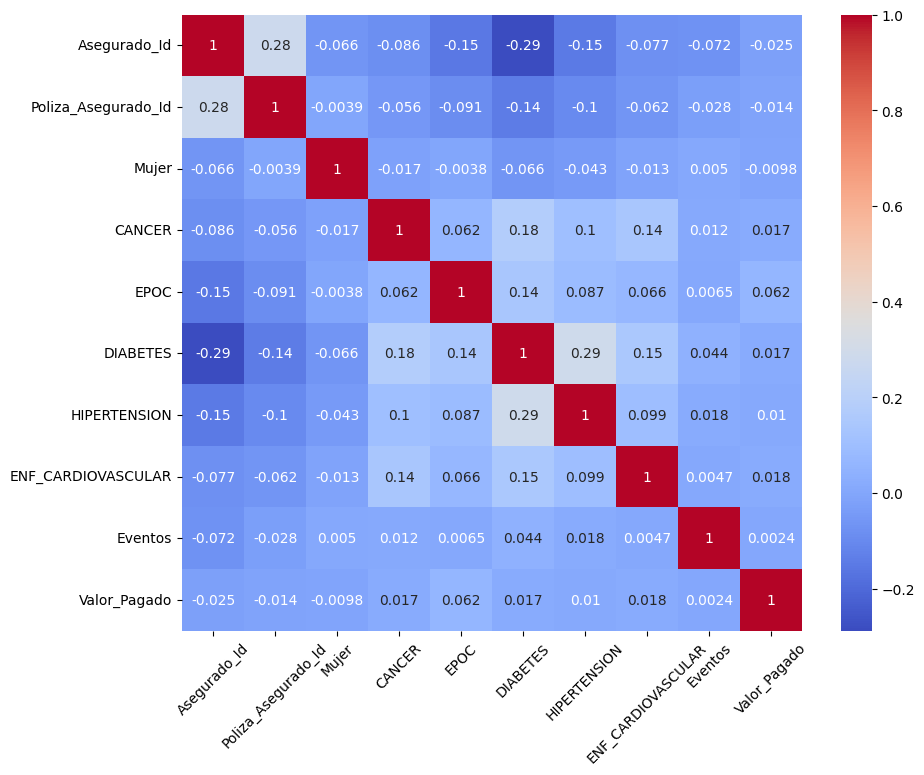

In [10]:
# Seleccionar solo las variables numéricas
numeric_vars = merged_data.select_dtypes(include='number')

# Crear la matriz de correlación
correlation_matrix = numeric_vars.corr()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

# Ajustar las etiquetas de los ejes
ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns, rotation=0)

# Mostrar la gráfica
plt.show()